In [2]:
#import packages
import sqlite3
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
#import files
products = pd.read_csv("PRODUCTS_TAKEHOME.csv")
trans = pd.read_csv("TRANSACTION_TAKEHOME.csv")
users = pd.read_csv("USER_TAKEHOME.csv")

In [4]:
#connect to sqlite DB and test connection
conn = sqlite3.connect("fetch.db")  # Creates or connects to an SQLite database
cursor = conn.cursor()

print(cursor.execute("SELECT * FROM users limit 5").fetchall())

[('5ef3b4f17053ab141787697d', '2020-06-24 20:17:54.000 Z', '2000-08-11 00:00:00.000 Z', 'CA', 'es-419', 'female'), ('5ff220d383fcfc12622b96bc', '2021-01-03 19:53:55.000 Z', '2001-09-24 04:00:00.000 Z', 'PA', 'en', 'female'), ('6477950aa55bb77a0e27ee10', '2023-05-31 18:42:18.000 Z', '1994-10-28 00:00:00.000 Z', 'FL', 'es-419', 'female'), ('658a306e99b40f103b63ccf8', '2023-12-26 01:46:22.000 Z', None, 'NC', 'en', None), ('653cf5d6a225ea102b7ecdc2', '2023-10-28 11:51:50.000 Z', '1972-03-19 00:00:00.000 Z', 'PA', 'en', 'female')]


## Part 1: Data Exploration

In [6]:
# Initial view of data tables 
# Observing the shape, a few sample rows of the table and the count, unique values, and top values for each column.
print("Users table:")
display(users.shape)
display(users.head())
display(users.describe())

print("\nTransactions table:")
display(trans.shape)
display(trans.head())
display(trans.describe(include="object"))

print("\nProducts table:")
display(products.shape)
display(products.head())
display(products.describe(include="object"))

Users table:


(100000, 6)

,ID,CREATED_DATE,BIRTH_DATE,STATE,LANGUAGE,GENDER
0,5ef3b4f17053ab141787697d,2020-06-24 20:17:54.000 Z,2000-08-11 00:00:00.000 Z,CA,es-419,female
1,5ff220d383fcfc12622b96bc,2021-01-03 19:53:55.000 Z,2001-09-24 04:00:00.000 Z,PA,en,female
2,6477950aa55bb77a0e27ee10,2023-05-31 18:42:18.000 Z,1994-10-28 00:00:00.000 Z,FL,es-419,female
3,658a306e99b40f103b63ccf8,2023-12-26 01:46:22.000 Z,NaN,NC,en,NaN
4,653cf5d6a225ea102b7ecdc2,2023-10-28 11:51:50.000 Z,1972-03-19 00:00:00.000 Z,PA,en,female


,ID,CREATED_DATE,BIRTH_DATE,STATE,LANGUAGE,GENDER
count,100000,100000,96325,95188,69492,94108
unique,100000,99942,54721,52,2,11
top,5ef3b4f17053ab141787697d,2023-01-12 18:30:15.000 Z,1970-01-01 00:00:00.000 Z,TX,en,female
freq,1,2,1272,9028,63403,64240



Transactions table:


(50000, 8)

,RECEIPT_ID,PURCHASE_DATE,SCAN_DATE,STORE_NAME,USER_ID,BARCODE,FINAL_QUANTITY,FINAL_SALE
0,0000d256-4041-4a3e-adc4-5623fb6e0c99,2024-08-21,2024-08-21 14:19:06.539 Z,WALMART,63b73a7f3d310dceeabd4758,1.530001e+10,1.00,
1,0001455d-7a92-4a7b-a1d2-c747af1c8fd3,2024-07-20,2024-07-20 09:50:24.206 Z,ALDI,62c08877baa38d1a1f6c211a,NaN,zero,1.49
2,00017e0a-7851-42fb-bfab-0baa96e23586,2024-08-18,2024-08-19 15:38:56.813 Z,WALMART,60842f207ac8b7729e472020,7.874223e+10,1.00,
3,000239aa-3478-453d-801e-66a82e39c8af,2024-06-18,2024-06-19 11:03:37.468 Z,FOOD LION,63fcd7cea4f8442c3386b589,7.833997e+11,zero,3.49
4,00026b4c-dfe8-49dd-b026-4c2f0fd5c6a1,2024-07-04,2024-07-05 15:56:43.549 Z,RANDALLS,6193231ae9b3d75037b0f928,4.790050e+10,1.00,


,RECEIPT_ID,PURCHASE_DATE,SCAN_DATE,STORE_NAME,USER_ID,FINAL_QUANTITY,FINAL_SALE
count,50000,50000,50000,50000,50000,50000,50000
unique,24440,89,24440,954,17694,87,1435
top,bedac253-2256-461b-96af-267748e6cecf,2024-06-15,2024-09-08 20:00:42.348 Z,WALMART,64e62de5ca929250373e6cf5,1.00,
freq,12,774,12,21326,22,35698,12500



Products table:


(845552, 7)

,CATEGORY_1,CATEGORY_2,CATEGORY_3,CATEGORY_4,MANUFACTURER,BRAND,BARCODE
0,Health & Wellness,Sexual Health,Conductivity Gels & Lotions,NaN,NaN,NaN,7.964944e+11
1,Snacks,Puffed Snacks,Cheese Curls & Puffs,NaN,NaN,NaN,2.327801e+10
2,Health & Wellness,Hair Care,Hair Care Accessories,NaN,PLACEHOLDER MANUFACTURER,ELECSOP,4.618178e+11
3,Health & Wellness,Oral Care,Toothpaste,NaN,COLGATE-PALMOLIVE,COLGATE,3.500047e+10
4,Health & Wellness,Medicines & Treatments,Essential Oils,NaN,MAPLE HOLISTICS AND HONEYDEW PRODUCTS INTERCHA...,MAPLE HOLISTICS,8.068109e+11


,CATEGORY_1,CATEGORY_2,CATEGORY_3,CATEGORY_4,MANUFACTURER,BRAND
count,845441,844128,784986,67459,619078,619080
unique,27,121,344,127,4354,8122
top,Health & Wellness,Candy,Confection Candy,Lip Balms,PLACEHOLDER MANUFACTURER,REM BRAND
freq,512695,121036,56965,9737,86902,20813


In [7]:
# I wanted to see the date range of the transactions, since there are only 50,000. It looks like they are all from a 3 month range.
# I assume this is not a mistake and that the analysis is supposed to only focus on a short time period.
print("Min date: ", trans['SCAN_DATE'].min())
print("Max date: ", trans['SCAN_DATE'].max())

Min date:  2024-06-12 06:36:34.910 Z
Max date:  2024-09-08 23:07:19.836 Z


In [8]:
# Additional exploration based on initial view of data. 
# I want to look at the top values and frequencies from some of the columns that stood out to me as having potential issues
cursor.execute('''select 
                FINAL_QUANTITY,
                count(*) as count
            FROM trans group by FINAL_QUANTITY order by count desc limit 20''').fetchall()

[('1.00', 35698),
 ('zero', 12500),
 ('2.00', 1285),
 ('3.00', 184),
 ('4.00', 139),
 ('6.00', 26),
 ('5.00', 22),
 ('8.00', 8),
 ('7.00', 7),
 ('12.00', 7),
 ('10.00', 5),
 ('1.40', 4),
 ('1.35', 4),
 ('0.23', 4),
 ('9.00', 3),
 ('1.47', 3),
 ('1.28', 3),
 ('0.86', 3),
 ('0.46', 3),
 ('4.55', 2)]

In [9]:
cursor.execute('''select 
                FINAL_SALE,
                count(*) as count
            FROM trans group by FINAL_SALE order by count desc limit 20''').fetchall()

[(' ', 12500),
 ('1.25', 1323),
 ('1.00', 744),
 ('2.99', 588),
 ('1.99', 586),
 ('3.99', 567),
 ('2.00', 537),
 ('3.98', 508),
 ('4.99', 484),
 ('0.00', 480),
 ('1.98', 450),
 ('5.99', 402),
 ('2.98', 395),
 ('2.50', 354),
 ('1.50', 343),
 ('2.49', 328),
 ('4.98', 315),
 ('1.97', 306),
 ('3.00', 303),
 ('3.49', 301)]

In [10]:
cursor.execute('''select 
                CATEGORY_1,
                count(*) as count
            FROM products group by CATEGORY_1 order by count desc limit 20''').fetchall()

[('Health & Wellness', 512695),
 ('Snacks', 324817),
 ('Beverages', 3990),
 ('Pantry', 871),
 ('Apparel & Accessories', 846),
 ('Dairy', 602),
 ('Needs Review', 547),
 ('Alcohol', 503),
 ('Home & Garden', 115),
 (None, 111),
 ('Restaurant', 69),
 ('Deli & Bakery', 69),
 ('Frozen', 62),
 ('Meat & Seafood', 49),
 ('Sporting Goods', 47),
 ('Office & School', 45),
 ('Toys & Games', 28),
 ('Household Supplies', 24),
 ('Produce', 20),
 ('Animals & Pet Supplies', 16)]

In [11]:
cursor.execute('''select 
                CATEGORY_4,
                count(*) as count
            FROM products group by CATEGORY_4 order by count desc limit 20''').fetchall()

[(None, 778093),
 ('Lip Balms', 9737),
 ('Already Popped Popcorn', 6974),
 ('Sleep Aids', 4978),
 ('Hair Brushes & Combs', 4724),
 ("Women's Shaving Gel & Cream", 3874),
 ("Men's Razors", 2840),
 ('Heartburn & Antacids Medicines & Treatments', 2756),
 ('Constipation Relief Medicines & Treatments', 2739),
 ('Immune Support', 2682),
 ('Microwave Popcorn', 2313),
 ("Women's Razors", 2296),
 ('Cough & Chest Congestion Medicines & Treatments', 2213),
 ('Hair Straighteners', 2036),
 ('Gas Relief Medicines & Treatments', 1745),
 ('Regular Cola', 1555),
 ('Cold & Flu Medicines & Treatments', 1416),
 ('Medicated Lip Treatments', 1324),
 ('Skin Toners', 1254),
 ('Hair Dryers', 1132)]

In [12]:
cursor.execute('''select 
                STORE_NAME,
                count(*) as count
            FROM trans group by STORE_NAME order by count desc limit 20''').fetchall()

[('WALMART', 21326),
 ('DOLLAR GENERAL STORE', 2748),
 ('ALDI', 2640),
 ('KROGER', 1494),
 ('TARGET', 1484),
 ('DOLLAR TREE STORES INC', 1238),
 ('PUBLIX', 1192),
 ('MEIJER', 1174),
 ('CVS', 1172),
 ('WALGREENS', 1132),
 ('COSTCO', 1038),
 ("SAM'S CLUB", 1030),
 ('FOOD LION', 606),
 ('SHOP RITE', 570),
 ('H-E-B', 512),
 ('FAMILY DOLLAR', 504),
 ('SAFEWAY', 398),
 ('AMAZON', 332),
 ("BJ'S WHOLESALE CLUB", 312),
 ('WINCO FOODS', 294)]

In [13]:
cursor.execute('''select 
                GENDER,
                count(*) as count
            FROM users group by GENDER order by count desc''').fetchall()

[('female', 64240),
 ('male', 25829),
 (None, 5892),
 ('transgender', 1772),
 ('prefer_not_to_say', 1350),
 ('non_binary', 473),
 ('unknown', 196),
 ('not_listed', 180),
 ('Non-Binary', 34),
 ('not_specified', 28),
 ("My gender isn't listed", 5),
 ('Prefer not to say', 1)]

In [14]:
# testing joins
trans_users = pd.read_sql('''select  
                *
            FROM trans
            inner join users on trans.user_id=users.id''', conn)

print("# records in trans_users inner join: ", len(trans_users))
trans_users.head(5)

# records in trans_users inner join:  262


,RECEIPT_ID,PURCHASE_DATE,SCAN_DATE,STORE_NAME,USER_ID,BARCODE,FINAL_QUANTITY,FINAL_SALE,ID,CREATED_DATE,BIRTH_DATE,STATE,LANGUAGE,GENDER
0,00729da3-2564-4616-a4ea-7426232d52e8,2024-08-30,2024-09-03 13:00:21.972 Z,FAMILY DOLLAR,62e5a95ca6565cf0534c989c,3.400008e+10,1.00,,62e5a95ca6565cf0534c989c,2022-07-30 21:57:48.000 Z,1961-07-21 00:00:00.000 Z,FL,en,female
1,00ad12b5-a990-4f56-b7d8-78a506c36529,2024-08-18,2024-08-18 16:22:58.531 Z,7-ELEVEN,610a8541ca1fab5b417b5d33,4.000000e+10,zero,2.39,610a8541ca1fab5b417b5d33,2021-08-04 12:17:05.000 Z,1977-01-12 00:00:00.000 Z,NY,en,male
2,019520fd-f28b-42ff-a29e-d6bf4f5c4b7c,2024-08-19,2024-08-19 11:19:59.681 Z,MEIJER,646bdaa67a342372c857b958,4.125009e+10,zero,2.49,646bdaa67a342372c857b958,2023-05-22 21:12:06.000 Z,1981-03-23 00:00:00.000 Z,WI,en,female
3,019520fd-f28b-42ff-a29e-d6bf4f5c4b7c,2024-08-19,2024-08-19 11:19:59.681 Z,MEIJER,646bdaa67a342372c857b958,4.125022e+10,1.00,,646bdaa67a342372c857b958,2023-05-22 21:12:06.000 Z,1981-03-23 00:00:00.000 Z,WI,en,female
4,02c675f0-3d0c-49ae-aa18-9422bb9b1cda,2024-06-28,2024-06-28 09:59:19.953 Z,PUBLIX,647281efa55bb77a0e26f586,7.203000e+10,1.00,,647281efa55bb77a0e26f586,2023-05-27 22:19:27.000 Z,1960-06-13 00:00:00.000 Z,FL,en,male


In [15]:
trans_products = pd.read_sql('''select  
                *
            FROM trans
            inner join products on trans.barcode=products.barcode''', conn)

print("# records in trans_products inner join: ", len(trans_products))
trans_products.head(5)

# records in trans_products inner join:  24854


,RECEIPT_ID,PURCHASE_DATE,SCAN_DATE,STORE_NAME,USER_ID,BARCODE,FINAL_QUANTITY,FINAL_SALE,CATEGORY_1,CATEGORY_2,CATEGORY_3,CATEGORY_4,MANUFACTURER,BRAND,BARCODE
0,0000d256-4041-4a3e-adc4-5623fb6e0c99,2024-08-21,2024-08-21 14:19:06.539 Z,WALMART,63b73a7f3d310dceeabd4758,1.530001e+10,1.00,,Pantry,Packaged Meals & Sides,Microwavable Sides,Microwavable Non-Potato Sides,PEPSICO,CHEETOS,1.530001e+10
1,0002d8cd-1701-4cdd-a524-b70402e2dbc0,2024-06-24,2024-06-24 19:44:54.247 Z,WALMART,5dcc6c510040a012b8e76924,6.811314e+11,zero,1.46,Snacks,Snack Cakes,Cakes & Truffles Snack Cakes,None,PLACEHOLDER MANUFACTURER,PRIVATE LABEL,6.811314e+11
2,00096c49-8b04-42f9-88ce-941c5e06c4a7,2024-08-19,2024-08-21 17:35:21.902 Z,TARGET,6144f4f1f3ef696919f54b5c,7.830007e+10,zero,3.59,Health & Wellness,Menstrual Care,Menstrual Care Liners,None,EDGEWELL,CAREFREE,7.830007e+10
3,00177c13-f50e-4fbe-839e-47dbe20a39f0,2024-07-15,2024-07-16 09:51:06.183 Z,WALMART,61e962f64e54c329499f2df2,7.874235e+10,1.00,,Snacks,Chips,Potato Chips,None,WALMART INC.,GREAT VALUE,7.874235e+10
4,001e5563-cdec-4d46-8493-0d118a55b14c,2024-09-01,2024-09-03 09:58:58.757 Z,WALMART,5b5cc7cfd1c6b436c0d93abd,3.800014e+10,1.00,,Snacks,Chips,Crisps,None,KELLANOVA,PRINGLES,3.800014e+10


In [16]:
categories_plot = pd.read_sql('''select  
                category_1,
                count(1) as count
            FROM trans
            inner join products on trans.barcode=products.barcode
            group by category_1 order by count desc''', conn).dropna()


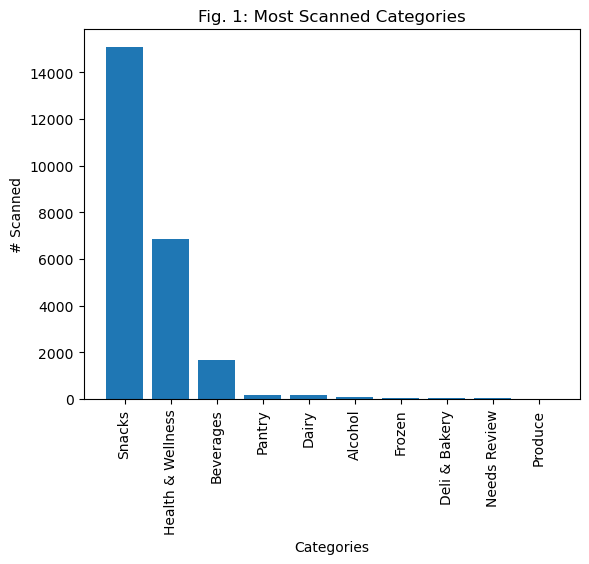

In [17]:
plt.bar(categories_plot['CATEGORY_1'], categories_plot['count'])
plt.xlabel('Categories')
plt.ylabel('# Scanned')
plt.title('Fig. 1: Most Scanned Categories')
plt.xticks(rotation=90)
plt.show()

In [18]:
categories_plot_join = pd.read_sql('''select  
                category_1,
                count(1) as count
            FROM trans
            inner join products on trans.barcode=products.barcode
            inner join users on trans.user_id = users.id
            group by category_1 order by count desc''', conn).dropna()

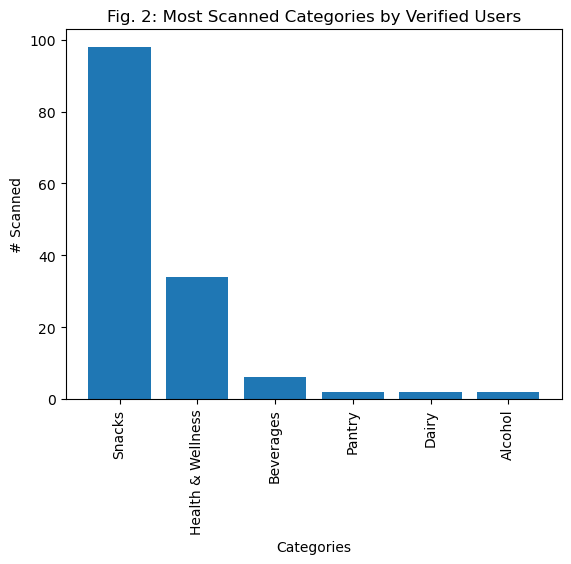

In [19]:
plt.bar(categories_plot_join['CATEGORY_1'], categories_plot_join['count'])
plt.xlabel('Categories')
plt.ylabel('# Scanned')
plt.title('Fig. 2: Most Scanned Categories by Verified Users')
plt.xticks(rotation=90)
plt.show()

In [20]:
cursor.execute('''select 
                trans.barcode,
                brand,
                manufacturer,
                count(*) as count
            FROM trans left join products on trans.barcode=products.barcode
            group by trans.barcode, brand, manufacturer
            order by count desc limit 20''').fetchall()

[(None, None, None, 5762),
 (78742223759.0, None, None, 182),
 (511111503972.0, 'PEPSI', 'PEPSICO', 168),
 (511111001768.0, 'CHEETOS', 'PEPSICO', 164),
 (78742285443.0, None, None, 158),
 (311111224057.0, 'COCA-COLA', 'THE COCA-COLA COMPANY', 150),
 (49000000443.0, 'COCA-COLA', 'THE COCA-COLA COMPANY', 142),
 (78742012285.0, None, None, 142),
 (511111703983.0, 'COCA-COLA', 'THE COCA-COLA COMPANY', 136),
 (78742097282.0, None, None, 110),
 (78742036397.0, None, None, 86),
 (21000658831.0, None, None, 82),
 (33383666020.0, None, None, 80),
 (311111460905.0, None, None, 76),
 (49000050103.0, 'COCA-COLA', 'THE COCA-COLA COMPANY', 68),
 (45605.0, None, None, 64),
 (28400199148.0, "LAY'S", 'PEPSICO', 64),
 (511111607816.0, 'SARGENTO', 'SARGENTO', 64),
 (64144043224.0, None, None, 62),
 (49000028904.0, 'COCA-COLA', 'THE COCA-COLA COMPANY', 60)]

#### Data Exploration Conclusions:

#### Are there any data quality issues present? Are there any fields that are challenging to understand?

Yes, as with most datasets, there are quality issues, as well as aspects to the data that is slightly confusing, particularly in the transactions table.  

In the **transactions** table, there are both data quality issues and some confusing entries. First of all, the transactions are only from a 3 month period - from June 12, 2024 to September 8, 2024. So we are only looking at a limited time frame for any analysis. The potential issues with fields are listed below:
* Barcodes: About 11% of entries have null barcodes. This may mean that there is no equivalent product in our database, or may be a result of an error with the scan to text upload feature, or something else.
* Final quantity: 12,500 entries (25% of the table) have the value "zero" as string text. This is strange because all the other data appears as numerical/floats. Also, it doesn't make sense for a transaction to have a quantity of zero- maybe it's a returned item? Also, some of the values in final quantity are not integers, which may be items like fruit/produce that are purchases by weight, but I would want clarification on what this means.
* Final sales: 12,500 entries (25% of the table) have a null value for final sales. Again, maybe this relates to returned items, or maybe it is some kind of data quality issue or glitch. The 12,500 null values here are not necessarily the ones that are listed as a "zero" for final quantity, which is also confusing.
* Joining with users: My other major concern that I noticed when joining with the users table, is that only a very small # of transactions actually matched with a known account in the user table. My assumption is that it is possible for users receipts without signing up for an account, but there may be another issue at play here, which I would want to clarify.
* *I would want to clarify and discuss these potential issues with barcode, final quantity, and final sales with our software or data engineering teams, since the accurate upload of receipts is extremely important to the business and to our insights in analytics.*

The **products** table contains several fields with a high % of null values which may cause issues.
* Categories 1-4: Category 1 is mostly complete (111 nulls), but it does have a category called "Needs Review" that well, may need review. The categories seem to go from most general (1) to most specific (4), and have more nulls as the category gets more specific. Category 4 is very sparsley populated (only 8% non-null values).
* Manufacturer & brand: Both of these fields are about 73% populated.
* Barcode: <1% of this field is null.
* *Working to fill in the more sparsley populated fields may be worth looking into, but probably not as high priority as fixing issues in the transaction table.*

The **users** table does contains mostly minor issues with nulls values. Potential issues listed below:
* Birthday, state, language preference, gender: In the users database, roughly 4% of users are missing a birthday, 5% are missing a state/location, 30% are missing a language preference, and 6% are missing a gender.
* These probably would not be major issues for most work, but making some of these fields required upon sign up could be considered if they were very important for analaytics or app features.
* *For instance, for the 4% of accounts with no birthday, we miss out on marketing opportunities such as birthday promotions.**





## Part 2: SQL Queries

#### 2.1 What are the top 5 brands by receipts scanned among users 21 and over?

See query below. The brands are Nerds Candy, Dove, Trident, Sour Patch Kids, and Meijer. We check the 21+ age requirement against the date 2/14/2025.

In [24]:
#sql query for 2.1
cursor.execute('''select 
                brand, 
                count(1) as count 
            FROM trans
            left join products ON trans.barcode=products.barcode
            left join users ON trans.user_id=users.id
            where products.brand is not null
            and ((julianday('2025-02-14') - (julianday(date(users.birth_date)))) / 365.25) >= 21
            and users.birth_date is not null
            group by brand order by count desc limit 5''')

#print results
rows = cursor.fetchall()
for row in rows:
    print(row)

('NERDS CANDY', 6)
('DOVE', 6)
('TRIDENT', 4)
('SOUR PATCH KIDS', 4)
('MEIJER', 4)


#### 2.2 What are the top 5 brands by sales among users that have had their account for at least six months?

See query below. The brands are CVS, Trident, Dove, Coors Light, and Quaker.

In [26]:
#sql query for 2.2
cursor.execute('''select 
                products.brand, 
                sum(trans.final_sale) as sales 
            FROM trans
            left join products ON trans.barcode=products.barcode
            left join users ON trans.user_id=users.id
            where products.brand is not null
            and ((julianday('2025-02-14') - (julianday(date(users.created_date)))) / 30.4375) >= 6
            group by brand order by sales desc limit 5''')

#print results
rows = cursor.fetchall()
for row in rows:
    print(row)

('CVS', 72.0)
('TRIDENT', 46.72)
('DOVE', 42.88)
('COORS LIGHT', 34.96)
('QUAKER', 16.6)


#### 2.3 Who are Fetch's power users?

See query below. I define a power user as anyone who was scanned 3+ receipts in the 3 month period that the transaction table contains. I used this metric because it represents higher engagement with the app as a repeat user within a short time frame. I think that # of receipts is more important than # of items scanned or sales as an engagement metric, which is why I picked it. By this metric, we have 347 power users. 

The query below prints the top 20 results from this list as well as # of receipts scanned, # of items scanned, total sales scanned, date of last scan, and Fetch join date (if the user could be linked to an account from the users table).

In [28]:
#sql query for question 2.3
power_users = pd.read_sql('''select 
                user_id, 
                count(distinct receipt_id) as total_receipts_scanned,
                sum(final_quantity) as total_items_scanned,
                sum(final_sale) as total_sales_scanned,
                max(date(scan_date)) as dt_last_scan,
                max(date(created_date)) as user_join_date
           
            FROM trans
            left join users ON trans.user_id=users.id
            group by user_id
            having total_receipts_scanned >=4
            order by total_receipts_scanned desc, total_sales_scanned desc''', conn)

print("# of Power Users: ", len(power_users))
print("Sample of top power users & key attributes: ")
power_users.head(20)

# of Power Users:  347
Sample of top power users & key attributes: 


,USER_ID,total_receipts_scanned,total_items_scanned,total_sales_scanned,dt_last_scan,user_join_date
0,64e62de5ca929250373e6cf5,10,13.00,57.65,2024-09-06,None
1,62925c1be942f00613f7365e,10,12.00,49.87,2024-08-02,None
2,64063c8880552327897186a5,9,14.00,43.72,2024-09-08,None
3,604278958fe03212b47e657b,7,15.00,46.61,2024-08-02,None
4,609af341659cf474018831fb,7,9.00,25.55,2024-09-05,None
5,624dca0770c07012cd5e6c03,7,13.00,21.91,2024-09-02,None
6,6327a07aca87b39d76e03864,7,11.00,15.64,2024-09-03,None
7,5d77d06b0d1bff4316a3ef47,6,14.00,60.73,2024-08-25,None
8,6240f64ee073a81bcca57670,6,9.00,57.33,2024-08-26,None
9,605a982894a5c74ba439e5ab,6,8.00,56.52,2024-09-08,None


   total_receipts_scanned  total_users
0                       1        12735
1                       2         3637
2                       3          975
3                       4          265
4                       5           61
5                       6           14
6                       7            4
7                       9            1
8                      10            2 



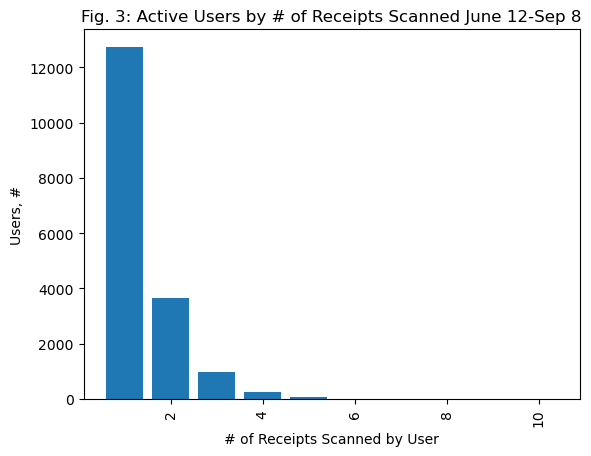

In [29]:
#supporting query for 2.3

receipts_plot = pd.read_sql('''
            select total_receipts_scanned,
            count(1) as total_users
            from
                (select 
                user_id, 
                count(distinct receipt_id) as total_receipts_scanned
                FROM trans
                left join users ON trans.user_id=users.id
                group by user_id) as receipts
            group by total_receipts_scanned order by total_receipts_scanned''', conn).dropna()

print(receipts_plot, "\n")

plt.bar(receipts_plot['total_receipts_scanned'], receipts_plot['total_users'])
plt.xlabel('# of Receipts Scanned by User')
plt.ylabel('Users, #')
plt.title('Fig. 3: Active Users by # of Receipts Scanned June 12-Sep 8')
plt.xticks(rotation=90)
plt.show()

## Part 3: Slack to stakeholders

Hi team, I'm providing an update on the review of transactions data from Jun-Sep 2024. 

First, I want to call attention to some potential data issues I noticed from the receipts in this time period. I'm concerned there may be a problem with our receipt upload technology or with the data loading process. About 11% of transactions from this period have no barcode. Additionally, 25% of of entries have "zero" as the final_quantity, and another 25% of entries have null for final_sales. I'm not sure why a final quantity would be "zero" on a receipt, or if this is another error. These issues seem to be occurring much more frequently than our typical error rate for receipts. **Can someone from our data engineering team weigh in on why I might be seeing these results? Or if this is a new issue, I recommend putting together a team to diagnose and address it. I can get things started by sharing a file of the transactions that appear problematic.**

Additionally, I noticed that only a small % of transactions (<1%) were actually linked back to verified accounts in our system. Maybe there is another data issue at play here, but I'm wondering if users are scanning receipts without ever actually signing up for an account. This is a major missed opportunity from both a data perspective and a user engagement perspective, so I recommend changing the app setup so that users are required to sign up *before* they can start scanning. **I recommend sending a push notification to users who have scanned a receipt but never completed a profile to nudge them to complete the sign up process.** 

I also wanted to share some insights on user engagement from this period. I segmented active users by the # of receipts they scanned in the 3 month period. With 24.4k distinct receipts scanned and 17.6k active users, on average, active users scanned 1.4 receipts in this period. See fig. 3 (attached/above) for the full breakdown. I came to the definition of a "power user" as anyone with 3+ receipts scanned, which represents about the top  7.5% of active users. **I plan to create a dashboard tracking active users and power users over time. I also would like to partner with marketing to develop a segmentation strategy for inactive, active and power users.** For instance, active-but-not-power-users could receive push notifications for better deals on receipts to draw them into the app. Power users don't necessarily need better deals on receipts because they are highly engaged, but they could get an offer for referring friends to sign up, or some other incentive to maintain engagement.

I look forward to connecting more on any of these topics - please reach out if you have any questions or comments.



In [32]:
# End of exercise. Thank you for reading!